Summary Statistics for Group_A:
         age  height    salary     rent
count   6.00    6.00      6.00     6.00
mean   27.17  168.00  60000.00  1416.67
std     3.60    5.10   7071.07   147.20
min    22.00  160.00  50000.00  1200.00
25%    25.25  165.75  56250.00  1325.00
50%    27.00  169.00  60000.00  1450.00
75%    29.50  170.00  63750.00  1500.00
max    32.00  175.00  70000.00  1600.00
cv     13.25    3.04     11.79    10.39




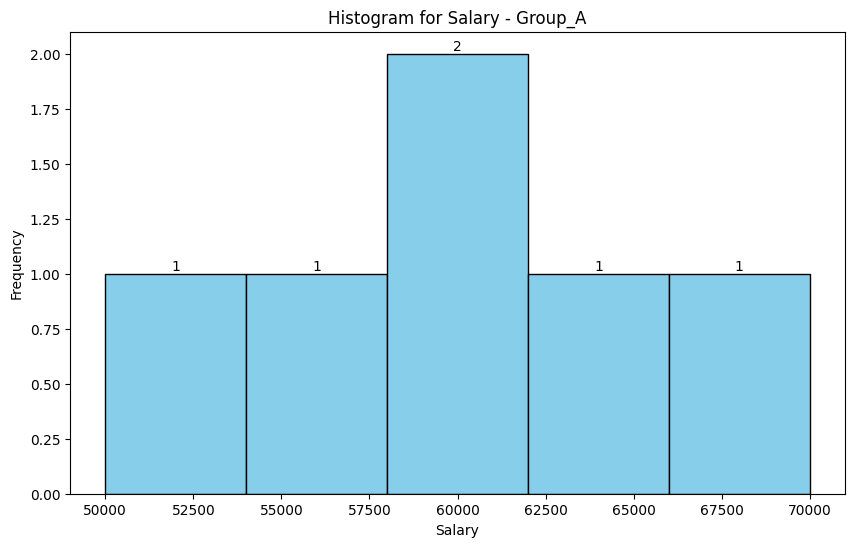

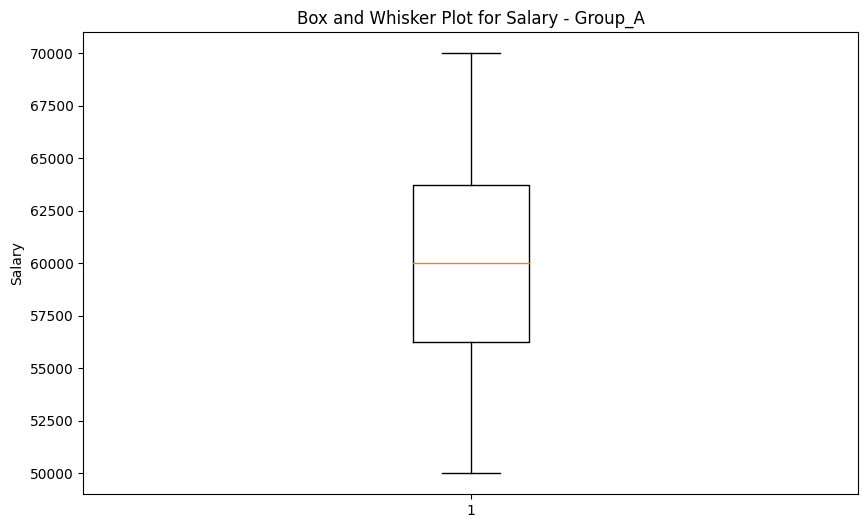

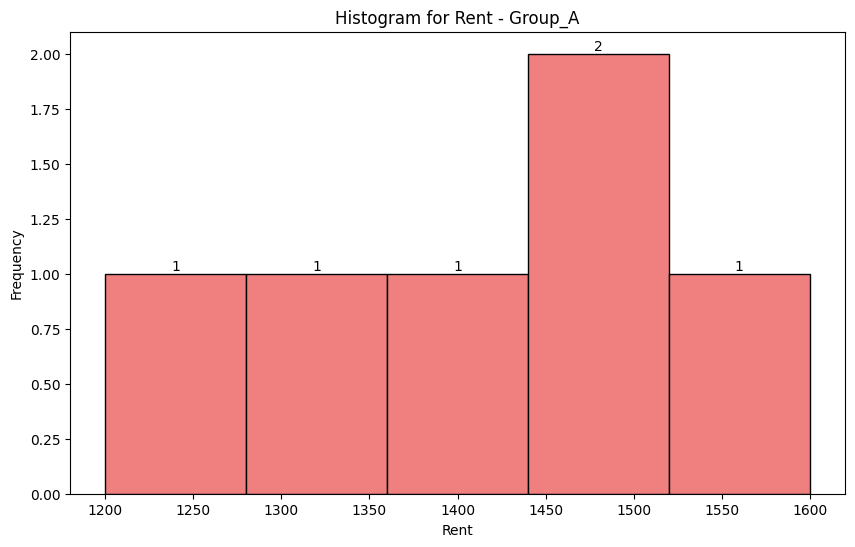

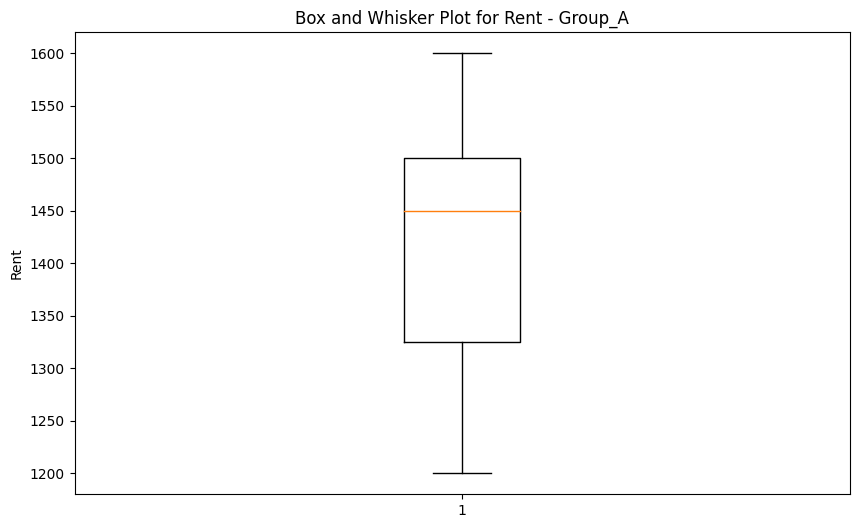

Summary Statistics for Group_B:
         age  height    salary     rent
count   6.00    6.00      6.00     6.00
mean   32.67  178.00  73666.67  1716.67
std     4.76    4.43   4966.55   160.21
min    27.00  172.00  65000.00  1600.00
25%    29.25  175.75  72750.00  1600.00
50%    33.00  178.00  75000.00  1650.00
75%    34.50  179.50  75000.00  1775.00
max    40.00  185.00  80000.00  2000.00
cv     14.57    2.49      6.74     9.33




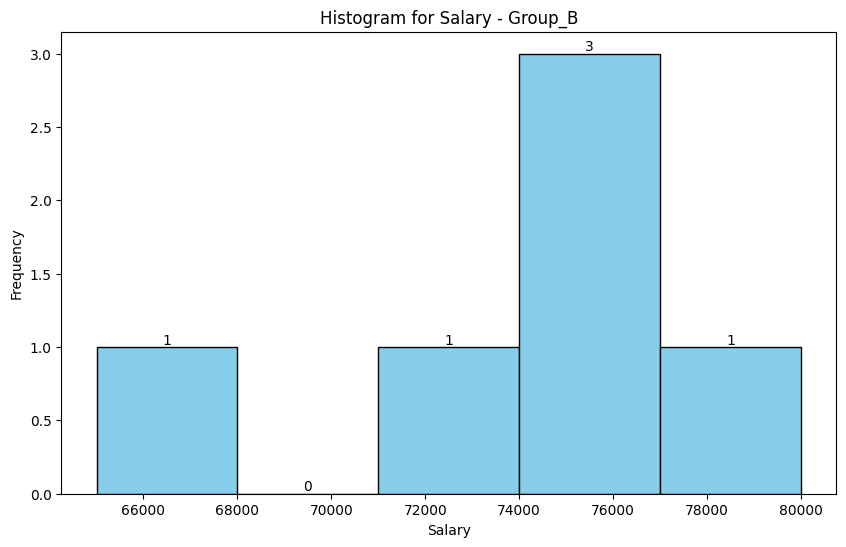

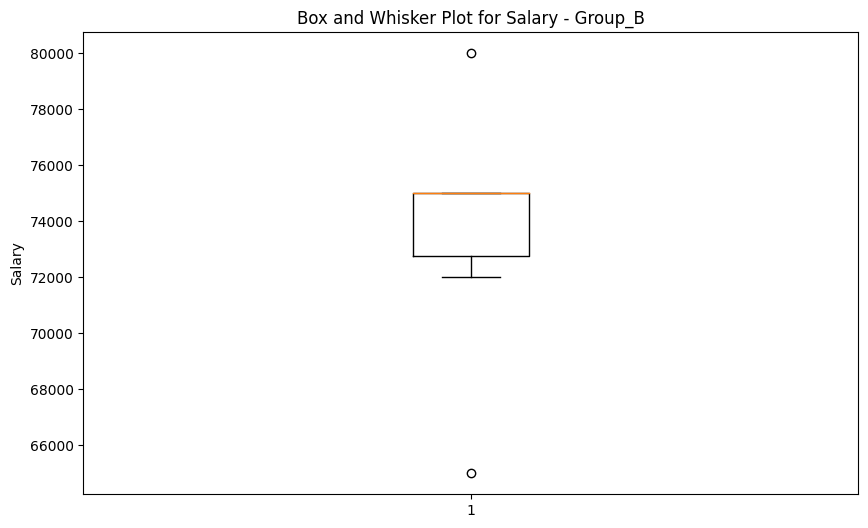

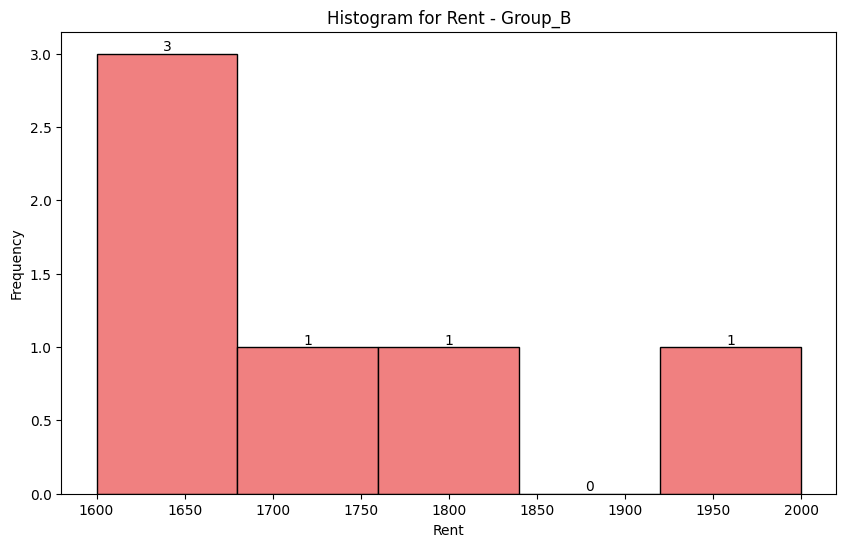

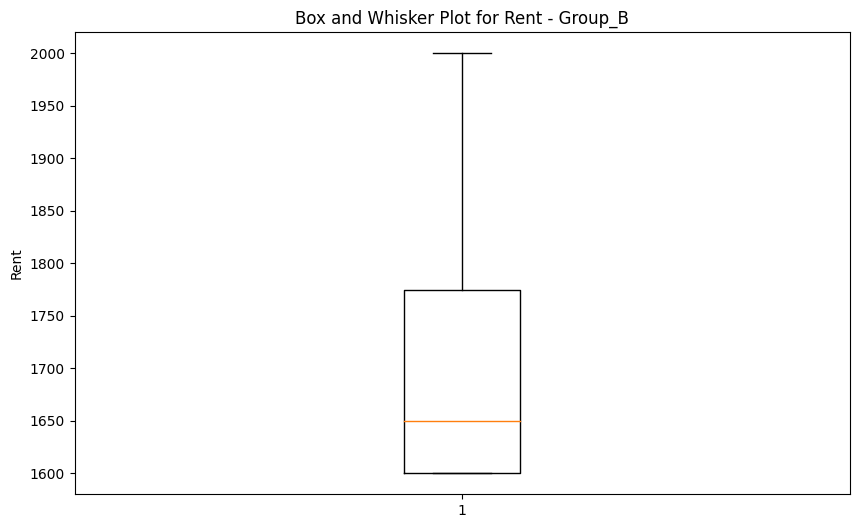

In [1]:
#I guees the first question for the data at hand is how many observations are there and other desctiptive questions
#This is a sample code that makes tables for those descriptives and very simple and quick histograms and box and whisker plots for visualization help
#choice of bins can be edited to use square root rule. scott's rule or freedman-diaconis rules. 
#I just use n=5 for the first exrcise and the square root rule for the second

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sample DataFrame
data = {
    'Population_Group': ['Group_A', 'Group_A', 'Group_B', 'Group_B', 'Group_A', 'Group_B', 'Group_A', 'Group_B', 'Group_A', 'Group_B', 'Group_A', 'Group_B'],
    'age': [25, 30, 35, 28, 22, 40, 32, 27, 26, 33, 28, 33],
    'height': [170, 165, 180, 175, 160, 185, 168, 172, 175, 178, 170, 178],
    'salary': [50000, 60000, 75000, 65000, 55000, 80000, 70000, 72000, 60000, 75000, 65000, 75000],
    'rent': [1500, 1200, 1800, 1600, 1300, 2000, 1500, 1700, 1400, 1600, 1600, 1600]
}

df = pd.DataFrame(data)

columns_stats = ["age", "height", "salary", "rent"]
summary_stats_dict = {}

for category in df['Population_Group'].unique():
    selected_df = df[df['Population_Group'] == category][columns_stats]
    summary_stats = selected_df.describe(percentiles=[.25, .75]).transpose()
    summary_stats['mean'] = selected_df.mean()
    summary_stats['std'] = selected_df.std()
    summary_stats['cv'] = (selected_df.std() / selected_df.mean()) * 100  # COEFFICIENT OF VARIATION
    formatted_stats = summary_stats.round(2)
    summary_stats_dict[category] = formatted_stats

    print(f"Summary Statistics for {category}:")
    print(formatted_stats.T)
    print("\n")

    # Histogram for 'salary'
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(selected_df['salary'], bins=5, color='skyblue', edgecolor='black') # can change number of bins
    plt.title(f'Histogram for Salary - {category}')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')

    # Add counts on top of each bar
    for count, patch in zip(n, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

    plt.show()

    # Box and whisker plot for 'salary'
    plt.figure(figsize=(10, 6))
    plt.boxplot(selected_df['salary'])
    plt.title(f'Box and Whisker Plot for Salary - {category}')
    plt.ylabel('Salary')
    plt.show()

    # Histogram for 'rent'
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(selected_df['rent'], bins=5, color='lightcoral', edgecolor='black') # can change number of bins
    plt.title(f'Histogram for Rent - {category}')
    plt.xlabel('Rent')
    plt.ylabel('Frequency')

    # Add counts on top of each bar
    for count, patch in zip(n, patches):
        plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

    plt.show()

    # Box and whisker plot for 'rent'
    plt.figure(figsize=(10, 6))
    plt.boxplot(selected_df['rent'])
    plt.title(f'Box and Whisker Plot for Rent - {category}')
    plt.ylabel('Rent')
    plt.show()



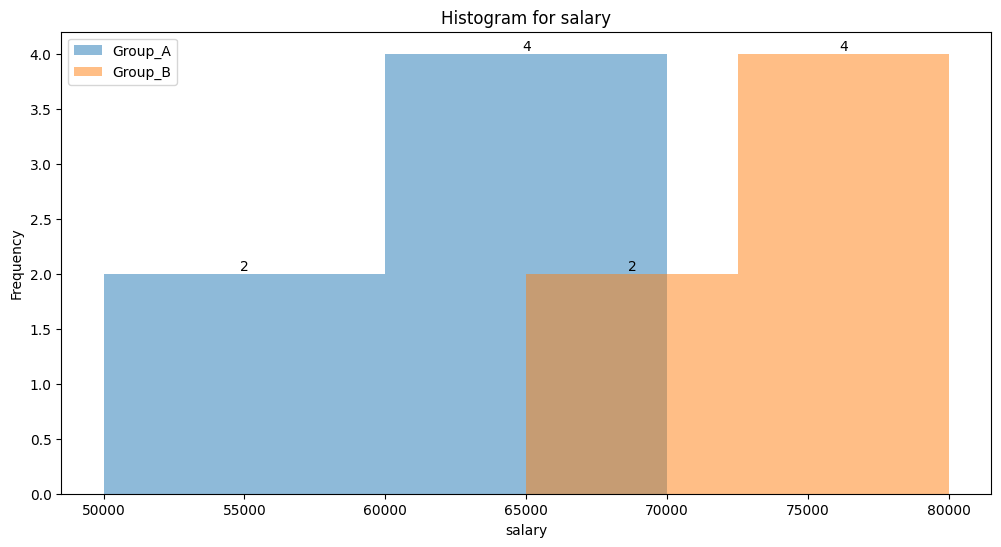

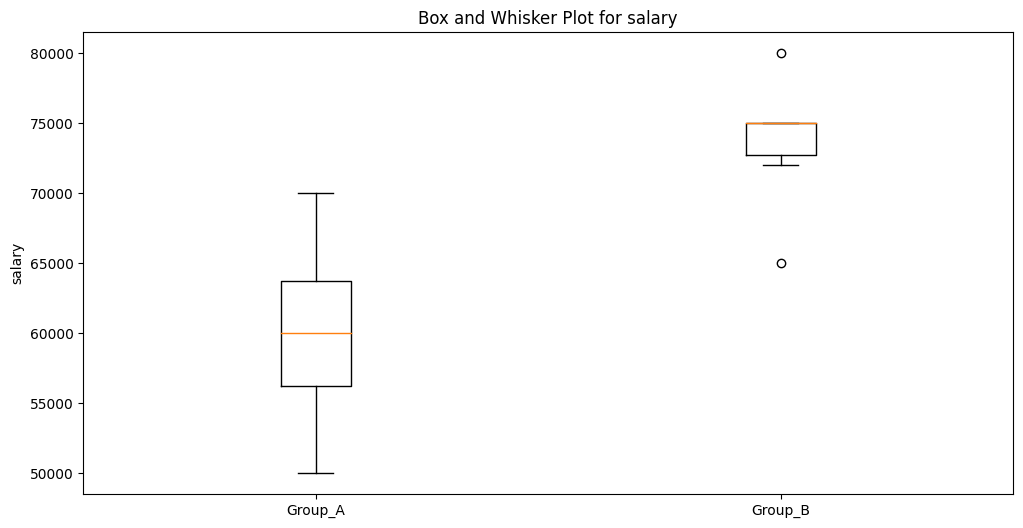

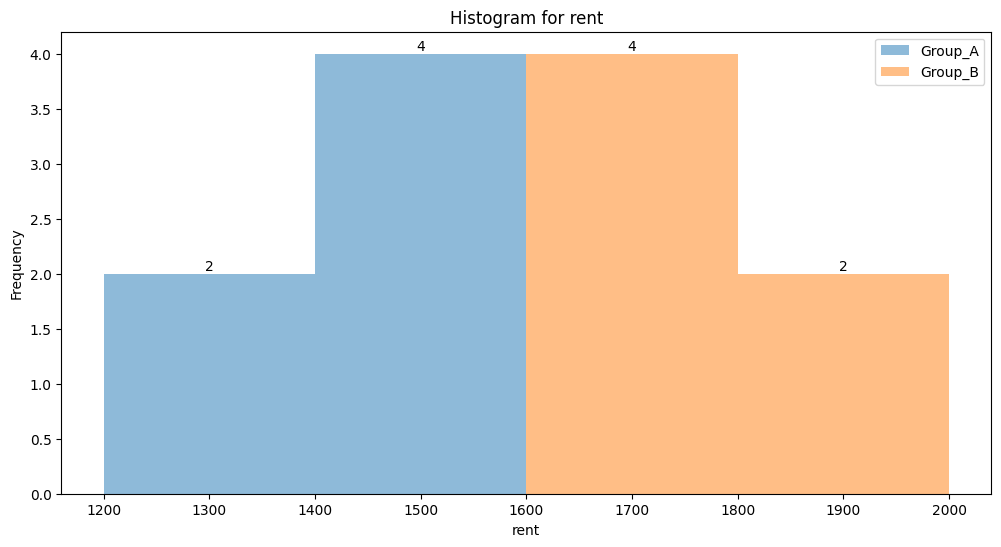

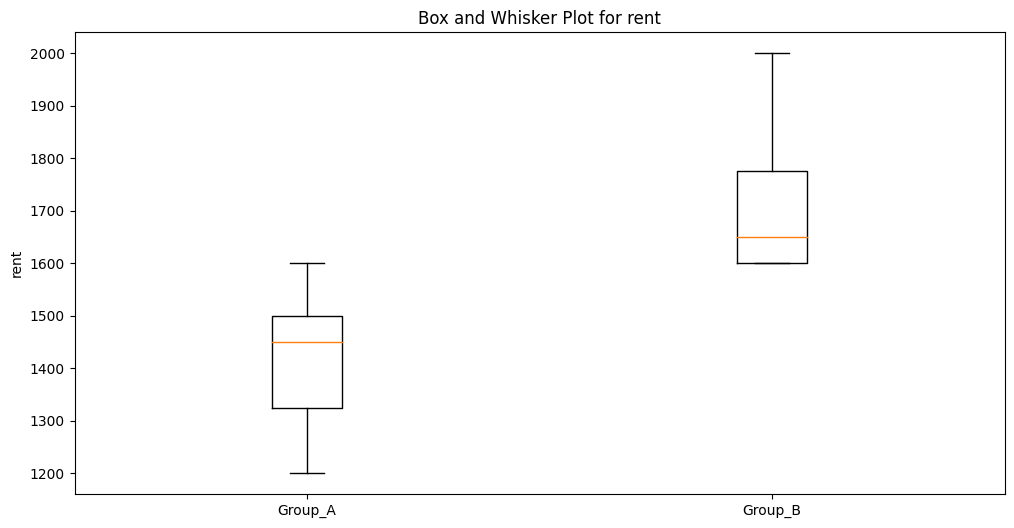

In [2]:
for stat in columns_stats[2:]:  # Iterate over 'salary' and 'rent'
    plt.figure(figsize=(12, 6))

    # Overlay histograms with counts
    for category, stats_df in summary_stats_dict.items():
        data_category = df[df['Population_Group'] == category][stat]

        # Determine the number of bins using the Square Root Rule
        num_bins = int(np.sqrt(len(data_category)))

        n, bins, patches = plt.hist(data_category, bins=num_bins, alpha=0.5, label=category)

        # Add counts on top of each bar
        for count, patch in zip(n, patches):
            plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

    plt.title(f'Histogram for {stat}')
    plt.xlabel(stat)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Side-by-side box and whisker plots
    plt.figure(figsize=(12, 6))
    plt.boxplot([df[df['Population_Group'] == 'Group_A'][stat], df[df['Population_Group'] == 'Group_B'][stat]],
                labels=['Group_A', 'Group_B'])
    plt.title(f'Box and Whisker Plot for {stat}')
    plt.ylabel(stat)
    plt.show()
